## project name :-video_game_analysis ##

## **project introduction:-**

This project aims to analyze the video game industry using two datasets — vgsales.csv and games_data.csv. The study focuses on understanding the relationship between game sales, player engagement, and user ratings across various platforms, publishers, and genres. The vgsales dataset contains information such as game names, platforms, release years, genres, publishers, and regional as well as global sales figures. The games_data dataset, on the other hand, provides insights into user interaction and engagement through attributes like ratings, number of reviews, plays, backlogs, and wishlists. The objective of this project is to clean and prepare the data using Python, perform structured analysis using SQL, and visualize key trends through Power BI. By combining these analytical approaches, the project aims to identify which genres and platforms generate the highest sales, which developers receive the best ratings, and how user engagement metrics correlate with overall sales performance. This comprehensive analysis provides a data-driven understanding of market trends and player preferences in the gaming industry.



## **project overview:-**

This project provides an end-to-end analysis of the global video game industry using two datasets — vgsales.csv and games_data.csv. The analysis begins with data cleaning and preparation in Python, where inconsistencies such as missing values and date format errors were handled carefully without deleting any records to maintain data integrity. The cleaned datasets were then uploaded to MySQL for structured querying, enabling deeper insights into trends such as top-selling games, leading publishers, and regional sales performance. In the next phase, Power BI was used to design interactive dashboards that visualize both sales and engagement patterns. The vgsales dataset highlights sales distribution across regions, platforms, and genres, while the games_data dataset explores user ratings, reviews, and wishlist trends. Together, these analyses reveal how game genres, platforms, and developer performance shape the market. The project integrates Python, SQL, and Power BI effectively to deliver a complete business understanding of the gaming ecosystem from both commercial and user perspectives.

## **Import liabraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# seaborn style for nice charts
sns.set_style('whitegrid')


## **Load Data**

In [2]:
vgsales = pd.read_csv("vgsales.csv")   # change path if needed
games = pd.read_csv("games.csv")


In [3]:
# quick check of shape (rows, columns)
print("vgsales shape:", vgsales.shape)
print("games shape  :", games.shape)


vgsales shape: (16598, 11)
games shape  : (1512, 14)


In [4]:
# preview first 5 rows of each dataset
print("=== vgsales preview ===")
display(vgsales.head())




=== vgsales preview ===


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
print("\n=== games preview ===")
display(games.head())



=== games preview ===


,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K


In [6]:
# check column names
print("\nColumns in vgsales:", vgsales.columns.tolist())
print("Columns in games  :", games.columns.tolist())



Columns in vgsales: ['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
Columns in games  : ['Unnamed: 0', 'Title', 'Release Date', 'Team', 'Rating', 'Times Listed', 'Number of Reviews', 'Genres', 'Summary', 'Reviews', 'Plays', 'Playing', 'Backlogs', 'Wishlist']


In [7]:
# Cell 3: data info & missing values

print("=== vgsales info ===")
vgsales.info()
print("\nMissing values in vgsales:\n", vgsales.isnull().sum())



=== vgsales info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB

Missing values in vgsales:
 Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0


In [8]:
print("\n=== games info ===")
games.info()
print("\nMissing values in games:\n", games.isnull().sum())



=== games info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1512 non-null   int64  
 1   Title              1512 non-null   object 
 2   Release Date       1512 non-null   object 
 3   Team               1511 non-null   object 
 4   Rating             1499 non-null   float64
 5   Times Listed       1512 non-null   object 
 6   Number of Reviews  1512 non-null   object 
 7   Genres             1512 non-null   object 
 8   Summary            1511 non-null   object 
 9   Reviews            1512 non-null   object 
 10  Plays              1512 non-null   object 
 11  Playing            1512 non-null   object 
 12  Backlogs           1512 non-null   object 
 13  Wishlist           1512 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 165.5+ KB

Missing values in games:
 Unnamed: 0   

In [9]:
# Cell 4: clean column names (lowercase, replace spaces with _)
def clean_columns(df):
    df = df.copy()
    df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]
    return df

vgsales = clean_columns(vgsales)
games = clean_columns(games)

print("vgsales columns:", vgsales.columns.tolist())
print("games columns  :", games.columns.tolist())


vgsales columns: ['rank', 'name', 'platform', 'year', 'genre', 'publisher', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales']
games columns  : ['unnamed:_0', 'title', 'release_date', 'team', 'rating', 'times_listed', 'number_of_reviews', 'genres', 'summary', 'reviews', 'plays', 'playing', 'backlogs', 'wishlist']


In [10]:
# Cell 5: convert year & sales columns to numeric

# Convert year to numeric
if "year" in vgsales.columns:
    vgsales["year"] = pd.to_numeric(vgsales["year"], errors="coerce")

# Convert sales columns
sales_cols = [c for c in vgsales.columns if "sales" in c]
for col in sales_cols:
    vgsales[col] = pd.to_numeric(vgsales[col], errors="coerce")

print(vgsales.dtypes[sales_cols + (["year"] if "year" in vgsales.columns else [])])


na_sales        float64
eu_sales        float64
jp_sales        float64
other_sales     float64
global_sales    float64
year            float64
dtype: object


In [ ]:
# Cell 6: handle missing values without dropping anything

# For numeric sales columns, replace NaN with 0 (safe assumption: no sales data = 0)
sales_cols = [c for c in vgsales.columns if "sales" in c]
for col in sales_cols:
    vgsales[col] = vgsales[col].fillna(0)

# For 'year', keep missing as NaN (don't remove any row)
if "year" in vgsales.columns:
    vgsales["year"] = pd.to_numeric(vgsales["year"], errors="coerce")

# For text columns (like name, publisher, genre), keep them as-is (NaN stays NaN)

# Final check
print("\nRemaining missing values:\n", vgsales.isnull().sum())


## **CHARTS AND VISUALIZATION**

C:\Users\acer\AppData\Local\Temp\ipykernel_10796\2385347173.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_games, x="global_sales", y="name", palette="viridis")


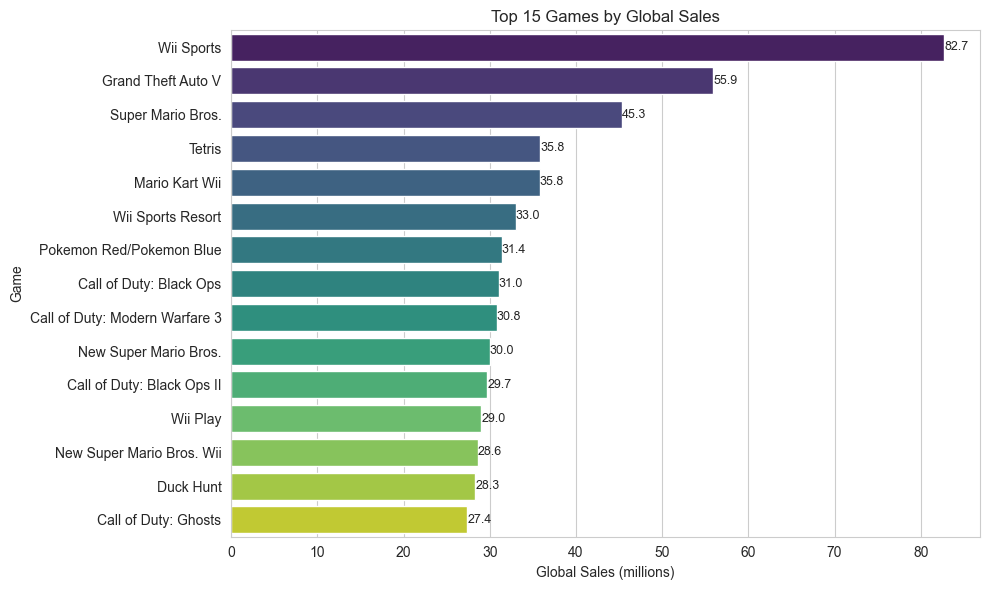

In [15]:
# Top 15 Games by Global Sales with Data Labels
top_games = (
    vgsales.groupby("name", as_index=False)["global_sales"]
    .sum()
    .sort_values("global_sales", ascending=False)
    .head(15)
)

plt.figure(figsize=(10,6))
ax = sns.barplot(data=top_games, x="global_sales", y="name", palette="viridis")

# Add labels
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f", label_type="edge", fontsize=9)

plt.title("Top 15 Games by Global Sales")
plt.xlabel("Global Sales (millions)")
plt.ylabel("Game")
plt.tight_layout()
plt.show()


C:\Users\acer\AppData\Local\Temp\ipykernel_10796\3718497802.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_genres, x="global_sales", y="genre", palette="coolwarm")


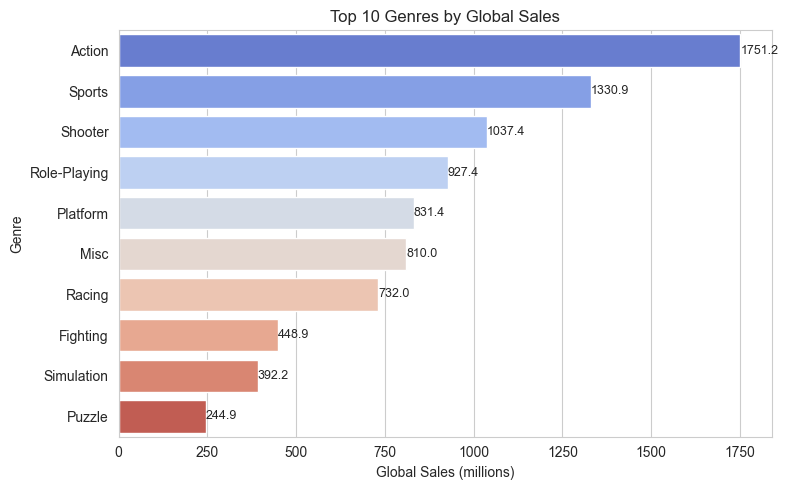

In [16]:
top_genres = (
    vgsales.groupby("genre", as_index=False)["global_sales"]
    .sum()
    .sort_values("global_sales", ascending=False)
    .head(10)
)

plt.figure(figsize=(8,5))
ax = sns.barplot(data=top_genres, x="global_sales", y="genre", palette="coolwarm")

for container in ax.containers:
    ax.bar_label(container, fmt="%.1f", fontsize=9)

plt.title("Top 10 Genres by Global Sales")
plt.xlabel("Global Sales (millions)")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()


C:\Users\acer\AppData\Local\Temp\ipykernel_10796\2441362894.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_platforms, x="global_sales", y="platform", palette="cubehelix")


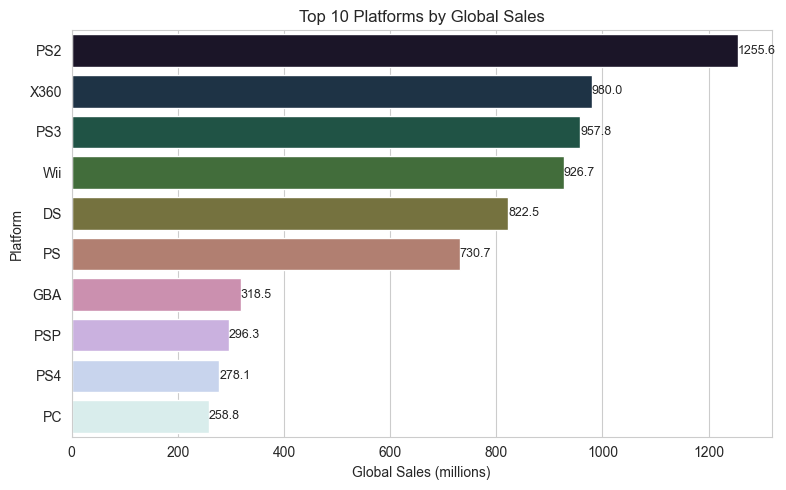

In [17]:
top_platforms = (
    vgsales.groupby("platform", as_index=False)["global_sales"]
    .sum()
    .sort_values("global_sales", ascending=False)
    .head(10)
)

plt.figure(figsize=(8,5))
ax = sns.barplot(data=top_platforms, x="global_sales", y="platform", palette="cubehelix")

for container in ax.containers:
    ax.bar_label(container, fmt="%.1f", fontsize=9)

plt.title("Top 10 Platforms by Global Sales")
plt.xlabel("Global Sales (millions)")
plt.ylabel("Platform")
plt.tight_layout()
plt.show()


C:\Users\acer\AppData\Local\Temp\ipykernel_10796\861530057.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_publishers, x="global_sales", y="publisher", palette="crest")


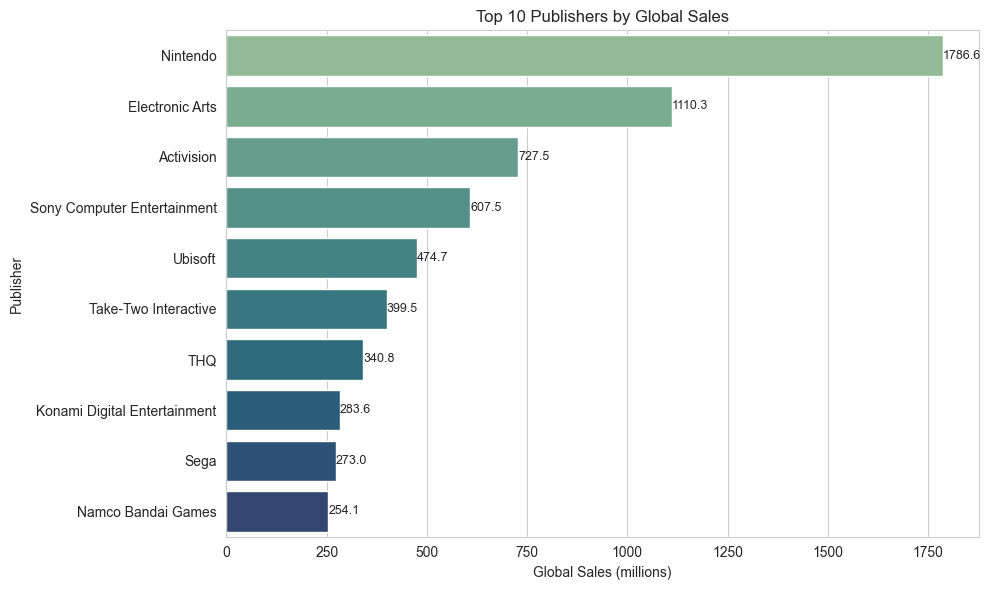

In [18]:
top_publishers = (
    vgsales.groupby("publisher", as_index=False)["global_sales"]
    .sum()
    .sort_values("global_sales", ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))
ax = sns.barplot(data=top_publishers, x="global_sales", y="publisher", palette="crest")

for container in ax.containers:
    ax.bar_label(container, fmt="%.1f", fontsize=9)

plt.title("Top 10 Publishers by Global Sales")
plt.xlabel("Global Sales (millions)")
plt.ylabel("Publisher")
plt.tight_layout()
plt.show()


C:\Users\acer\AppData\Local\Temp\ipykernel_10796\3646037487.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=region_sales.values, y=region_sales.index, palette="plasma")


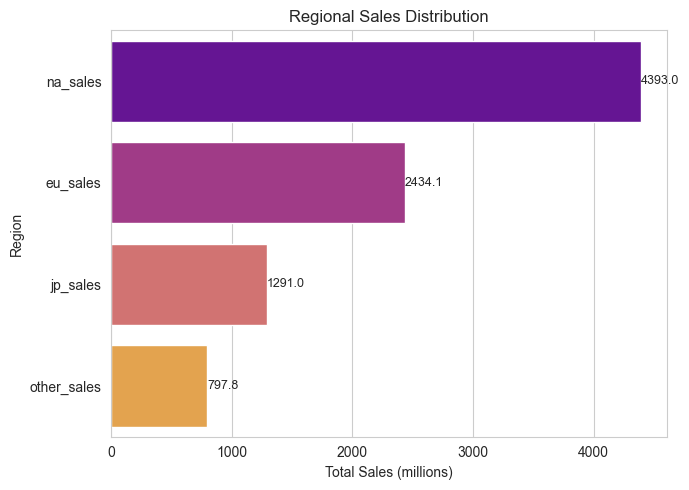

In [19]:
regions = ["na_sales", "eu_sales", "jp_sales", "other_sales"]
region_sales = vgsales[regions].sum().sort_values(ascending=False)

plt.figure(figsize=(7,5))
ax = sns.barplot(x=region_sales.values, y=region_sales.index, palette="plasma")

for container in ax.containers:
    ax.bar_label(container, fmt="%.1f", fontsize=9)

plt.title("Regional Sales Distribution")
plt.xlabel("Total Sales (millions)")
plt.ylabel("Region")
plt.tight_layout()
plt.show()


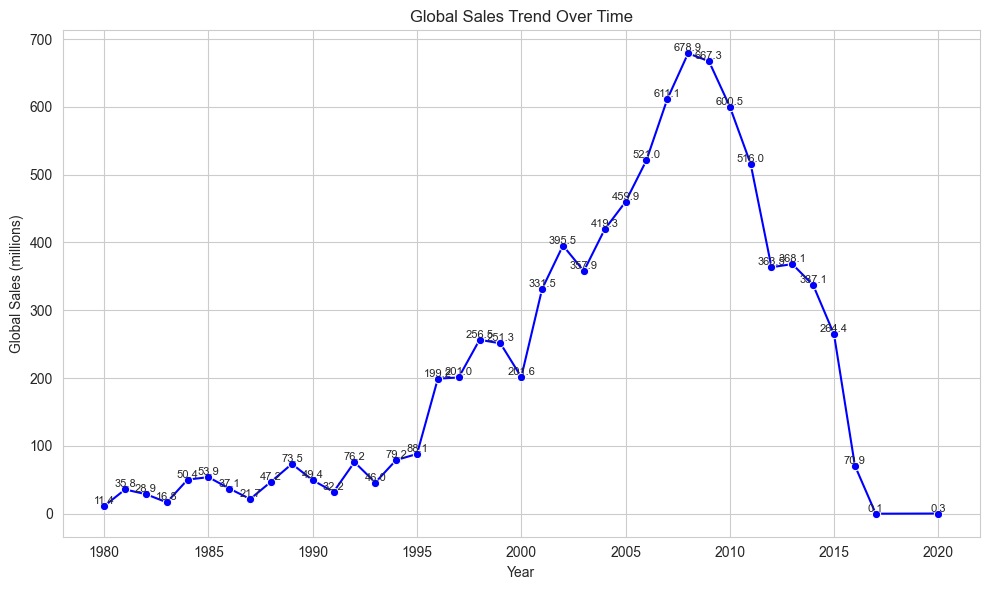

In [20]:
sales_by_year = (
    vgsales.groupby("year", as_index=False)["global_sales"]
    .sum()
    .sort_values("year")
)

plt.figure(figsize=(10,6))
ax = sns.lineplot(data=sales_by_year, x="year", y="global_sales", marker="o", color="b")

for x, y in zip(sales_by_year["year"], sales_by_year["global_sales"]):
    plt.text(x, y, f"{y:.1f}", ha="center", va="bottom", fontsize=8)

plt.title("Global Sales Trend Over Time")
plt.xlabel("Year")
plt.ylabel("Global Sales (millions)")
plt.tight_layout()
plt.show()


## **CONCLUSION**

In conclusion, this project successfully demonstrates how data-driven insights can be used to understand the dynamics of the video game industry. The findings show that action and sports games dominate global sales, North America contributes the most revenue, and top publishers like Nintendo and EA consistently lead the market. On the engagement side, higher-rated games often have more wishlist entries and reviews, reflecting stronger player interest and satisfaction. By combining data cleaning in Python, analysis in SQL, and visualization in Power BI, the project provides a holistic view of the gaming landscape—connecting user behavior with market performance. These insights can help developers, publishers, and analysts make informed decisions about future game releases, marketing strategies, and platform focus, ultimately driving better alignment between player expectations and business outcomes.